## Kabir Sinha
## Final Project - Unicorn Companies Dataset
## CMP 262
### This notebook will investigate properties and relationships between
### those properties of the top 1000 Unicorn companies worth at least 1B dollars,
### then the top 602 companies worth at least 2B dollars

In [179]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from datetime import date
import seaborn as sns

### Load csv file with company data into a pandas dataframe
### Initial Analysis for the original pandas data frame

In [180]:
df = pd.read_csv('Unicorn_Companies.csv')
df

,Company,Valuation,Date Joined,Industry,City,Country,Continent,Year Founded,Funding,Select Investors
0,Bytedance,$180B,2017-04-07,Artificial intelligence,Beijing,China,Asia,2012,$8B,"Sequoia Capital China, SIG Asia Investments, Sina Weibo, Softbank Group"
1,SpaceX,$100B,2012-12-01,Other,Hawthorne,United States,North America,2002,$7B,"Founders Fund, Draper Fisher Jurvetson, Rothenberg Ventures"
2,SHEIN,$100B,2018-07-03,E-commerce & direct-to-consumer,Shenzhen,China,Asia,2008,$2B,"Tiger Global Management, Sequoia Capital China, Shunwei Capital Partners"
3,Stripe,$95B,2014-01-23,Fintech,San Francisco,United States,North America,2010,$2B,"Khosla Ventures, LowercaseCapital, capitalG"
4,Klarna,$46B,2011-12-12,Fintech,Stockholm,Sweden,Europe,2005,$4B,"Institutional Venture Partners, Sequoia Capital, General Atlantic"
5,Canva,$40B,2018-01-08,Internet software & services,Surry Hills,Australia,Oceania,2012,$572M,"Sequoia Capital China, Blackbird Ventures, Matrix Partners"
6,Checkout.com,$40B,2019-05-02,Fintech,London,United Kingdom,Europe,2012,$2B,"Tiger Global Management, Insight Partners, DST Global"
7,Instacart,$39B,2014-12-30,"Supply chain, logistics, & delivery",San Francisco,United States,North America,2012,$3B,"Khosla Ventures, Kleiner Perkins Caufield & Byers, Collaborative Fund"
8,JUUL Labs,$38B,2017-12-20,Consumer & retail,San Francisco,United States,North America,2015,$14B,Tiger Global Management
9,Databricks,$38B,2019-02-05,Data management & analytics,San Francisco,United States,North America,2013,$3B,"Andreessen Horowitz, New Enterprise Associates, Battery Ventures"


#### Description of data/Column headings and data types/Table shape

In [181]:
df.describe

<bound method NDFrame.describe of                                Company Valuation Date Joined  \
0                            Bytedance     $180B  2017-04-07   
1                               SpaceX     $100B  2012-12-01   
2                                SHEIN     $100B  2018-07-03   
3                               Stripe      $95B  2014-01-23   
4                               Klarna      $46B  2011-12-12   
5                                Canva      $40B  2018-01-08   
6                         Checkout.com      $40B  2019-05-02   
7                            Instacart      $39B  2014-12-30   
8                            JUUL Labs      $38B  2017-12-20   
9                           Databricks      $38B  2019-02-05   
10                             Revolut      $33B  2018-04-26   
11                          Epic Games      $32B  2018-10-26   
12                                 FTX      $32B  2021-07-20   
13                            Fanatics      $27B  2012-06-06   
14    

In [182]:
df.columns

Index(['Company', 'Valuation', 'Date Joined', 'Industry', 'City', 'Country',
       'Continent', 'Year Founded', 'Funding', 'Select Investors'],
      dtype='object')

In [183]:
df.dtypes

Company             object
Valuation           object
Date Joined         object
Industry            object
City                object
Country             object
Continent           object
Year Founded         int64
Funding             object
Select Investors    object
dtype: object

In [184]:
df.shape

(1074, 10)

#### Head/tail/sample information from the dataset

In [185]:
df.head()

,Company,Valuation,Date Joined,Industry,City,Country,Continent,Year Founded,Funding,Select Investors
0,Bytedance,$180B,2017-04-07,Artificial intelligence,Beijing,China,Asia,2012,$8B,"Sequoia Capital China, SIG Asia Investments, Sina Weibo, Softbank Group"
1,SpaceX,$100B,2012-12-01,Other,Hawthorne,United States,North America,2002,$7B,"Founders Fund, Draper Fisher Jurvetson, Rothenberg Ventures"
2,SHEIN,$100B,2018-07-03,E-commerce & direct-to-consumer,Shenzhen,China,Asia,2008,$2B,"Tiger Global Management, Sequoia Capital China, Shunwei Capital Partners"
3,Stripe,$95B,2014-01-23,Fintech,San Francisco,United States,North America,2010,$2B,"Khosla Ventures, LowercaseCapital, capitalG"
4,Klarna,$46B,2011-12-12,Fintech,Stockholm,Sweden,Europe,2005,$4B,"Institutional Venture Partners, Sequoia Capital, General Atlantic"


In [186]:
df.tail()

,Company,Valuation,Date Joined,Industry,City,Country,Continent,Year Founded,Funding,Select Investors
1069,Zhaogang,$1B,2017-06-29,E-commerce & direct-to-consumer,Shanghai,China,Asia,2012,$379M,"K2 Ventures, Matrix Partners China, IDG Capital"
1070,Zhuan Zhuan,$1B,2017-04-18,E-commerce & direct-to-consumer,Beijing,China,Asia,2015,$990M,"58.com, Tencent Holdings"
1071,Zihaiguo,$1B,2021-05-06,Consumer & retail,Chongqing,China,Asia,2018,$80M,"Xingwang Investment Management, China Capital Investment Group, Matrix Partners China"
1072,Zopa,$1B,2021-10-19,Fintech,London,United Kingdom,Europe,2005,$792M,"IAG Capital Partners, Augmentum Fintech, Northzone Ventures"
1073,Zwift,$1B,2020-09-16,E-commerce & direct-to-consumer,Long Beach,United States,North America,2014,$620M,"Novator Partners, True, Causeway Media Partners"


In [187]:
df.sample()

,Company,Valuation,Date Joined,Industry,City,Country,Continent,Year Founded,Funding,Select Investors
865,Aqua Security,$1B,2021-03-10,Cybersecurity,Ramat Gan,Israel,Asia,2015,$265M,"TLV Partners, Lightspeed Venture Partners, M12"


In [188]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1074 entries, 0 to 1073
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Company           1074 non-null   object
 1   Valuation         1074 non-null   object
 2   Date Joined       1074 non-null   object
 3   Industry          1074 non-null   object
 4   City              1058 non-null   object
 5   Country           1074 non-null   object
 6   Continent         1074 non-null   object
 7   Year Founded      1074 non-null   int64 
 8   Funding           1074 non-null   object
 9   Select Investors  1073 non-null   object
dtypes: int64(1), object(9)
memory usage: 84.0+ KB


### Additional Analysis for Top 600 Companies

#### Removed the bottom 43.9% of Unicorn Company rows to investigate the trends of companies with valuations greater than $1B

In [153]:
df = df.drop(df.index[603:])

#### Renamed certain columns to more concise dataframe formatting

In [154]:
df.rename(columns={'Date Joined': 'Unicorn_status_date'}, inplace=True)
df.rename(columns={'Year Founded': 'Year_founded'}, inplace=True)
df.rename(columns={'Select Investors': 'Investor_groups'}, inplace=True)

In [155]:
df = pd.DataFrame(df)
df = df.dropna()
df

,Company,Valuation,Unicorn_status_date,Industry,City,Country,Continent,Year_founded,Funding,Investor_groups
0,Bytedance,$180B,2017-04-07,Artificial intelligence,Beijing,China,Asia,2012,$8B,"Sequoia Capital China, SIG Asia Investments, Sina Weibo, Softbank Group"
1,SpaceX,$100B,2012-12-01,Other,Hawthorne,United States,North America,2002,$7B,"Founders Fund, Draper Fisher Jurvetson, Rothenberg Ventures"
2,SHEIN,$100B,2018-07-03,E-commerce & direct-to-consumer,Shenzhen,China,Asia,2008,$2B,"Tiger Global Management, Sequoia Capital China, Shunwei Capital Partners"
3,Stripe,$95B,2014-01-23,Fintech,San Francisco,United States,North America,2010,$2B,"Khosla Ventures, LowercaseCapital, capitalG"
4,Klarna,$46B,2011-12-12,Fintech,Stockholm,Sweden,Europe,2005,$4B,"Institutional Venture Partners, Sequoia Capital, General Atlantic"
5,Canva,$40B,2018-01-08,Internet software & services,Surry Hills,Australia,Oceania,2012,$572M,"Sequoia Capital China, Blackbird Ventures, Matrix Partners"
6,Checkout.com,$40B,2019-05-02,Fintech,London,United Kingdom,Europe,2012,$2B,"Tiger Global Management, Insight Partners, DST Global"
7,Instacart,$39B,2014-12-30,"Supply chain, logistics, & delivery",San Francisco,United States,North America,2012,$3B,"Khosla Ventures, Kleiner Perkins Caufield & Byers, Collaborative Fund"
8,JUUL Labs,$38B,2017-12-20,Consumer & retail,San Francisco,United States,North America,2015,$14B,Tiger Global Management
9,Databricks,$38B,2019-02-05,Data management & analytics,San Francisco,United States,North America,2013,$3B,"Andreessen Horowitz, New Enterprise Associates, Battery Ventures"


In [156]:
df = df.fillna('No answer')

In [157]:
oldB = 'B'
newB = '000000000'
df['Valuation'] = df['Valuation'].str.replace(oldB, newB)
df.to_csv('Updated_table', index=False)

oldB2 = 'B'
newB2 = '000000000'
df['Funding'] = df['Funding'].str.replace(oldB2, newB2)
df.to_csv('Updated_table', index=False)

oldM = 'M'
newM = '000000'
df['Funding'] = df['Funding'].str.replace(oldM, newM)
df.to_csv('Updated_table', index=False)

In [158]:
df['Valuation'] = df['Valuation'].str.replace('$', '')
df['Funding'] = df['Funding'].str.replace('$', '')

### The following shows industries and percentages of investors
### with money in companies specializing in these industries

In [159]:
industry_investors = df.groupby('Industry')['Investor_groups'].count()
print('Industry', '          :          ', 'Investor Groups')
pd.set_option('display.max_rows', None)
industry_investors = industry_investors.sort_values(ascending=False)
print(industry_investors)

Industry           :           Investor Groups
Industry
Fintech                                134
Internet software & services           117
E-commerce & direct-to-consumer         59
Health                                  39
Artificial intelligence                 38
Other                                   30
Cybersecurity                           28
Data management & analytics             25
Supply chain, logistics, & delivery     25
Hardware                                22
Auto & transportation                   20
Mobile & telecommunications             18
Edtech                                  15
Consumer & retail                       14
Travel                                   8
Artificial Intelligence                  4
Name: Investor_groups, dtype: int64


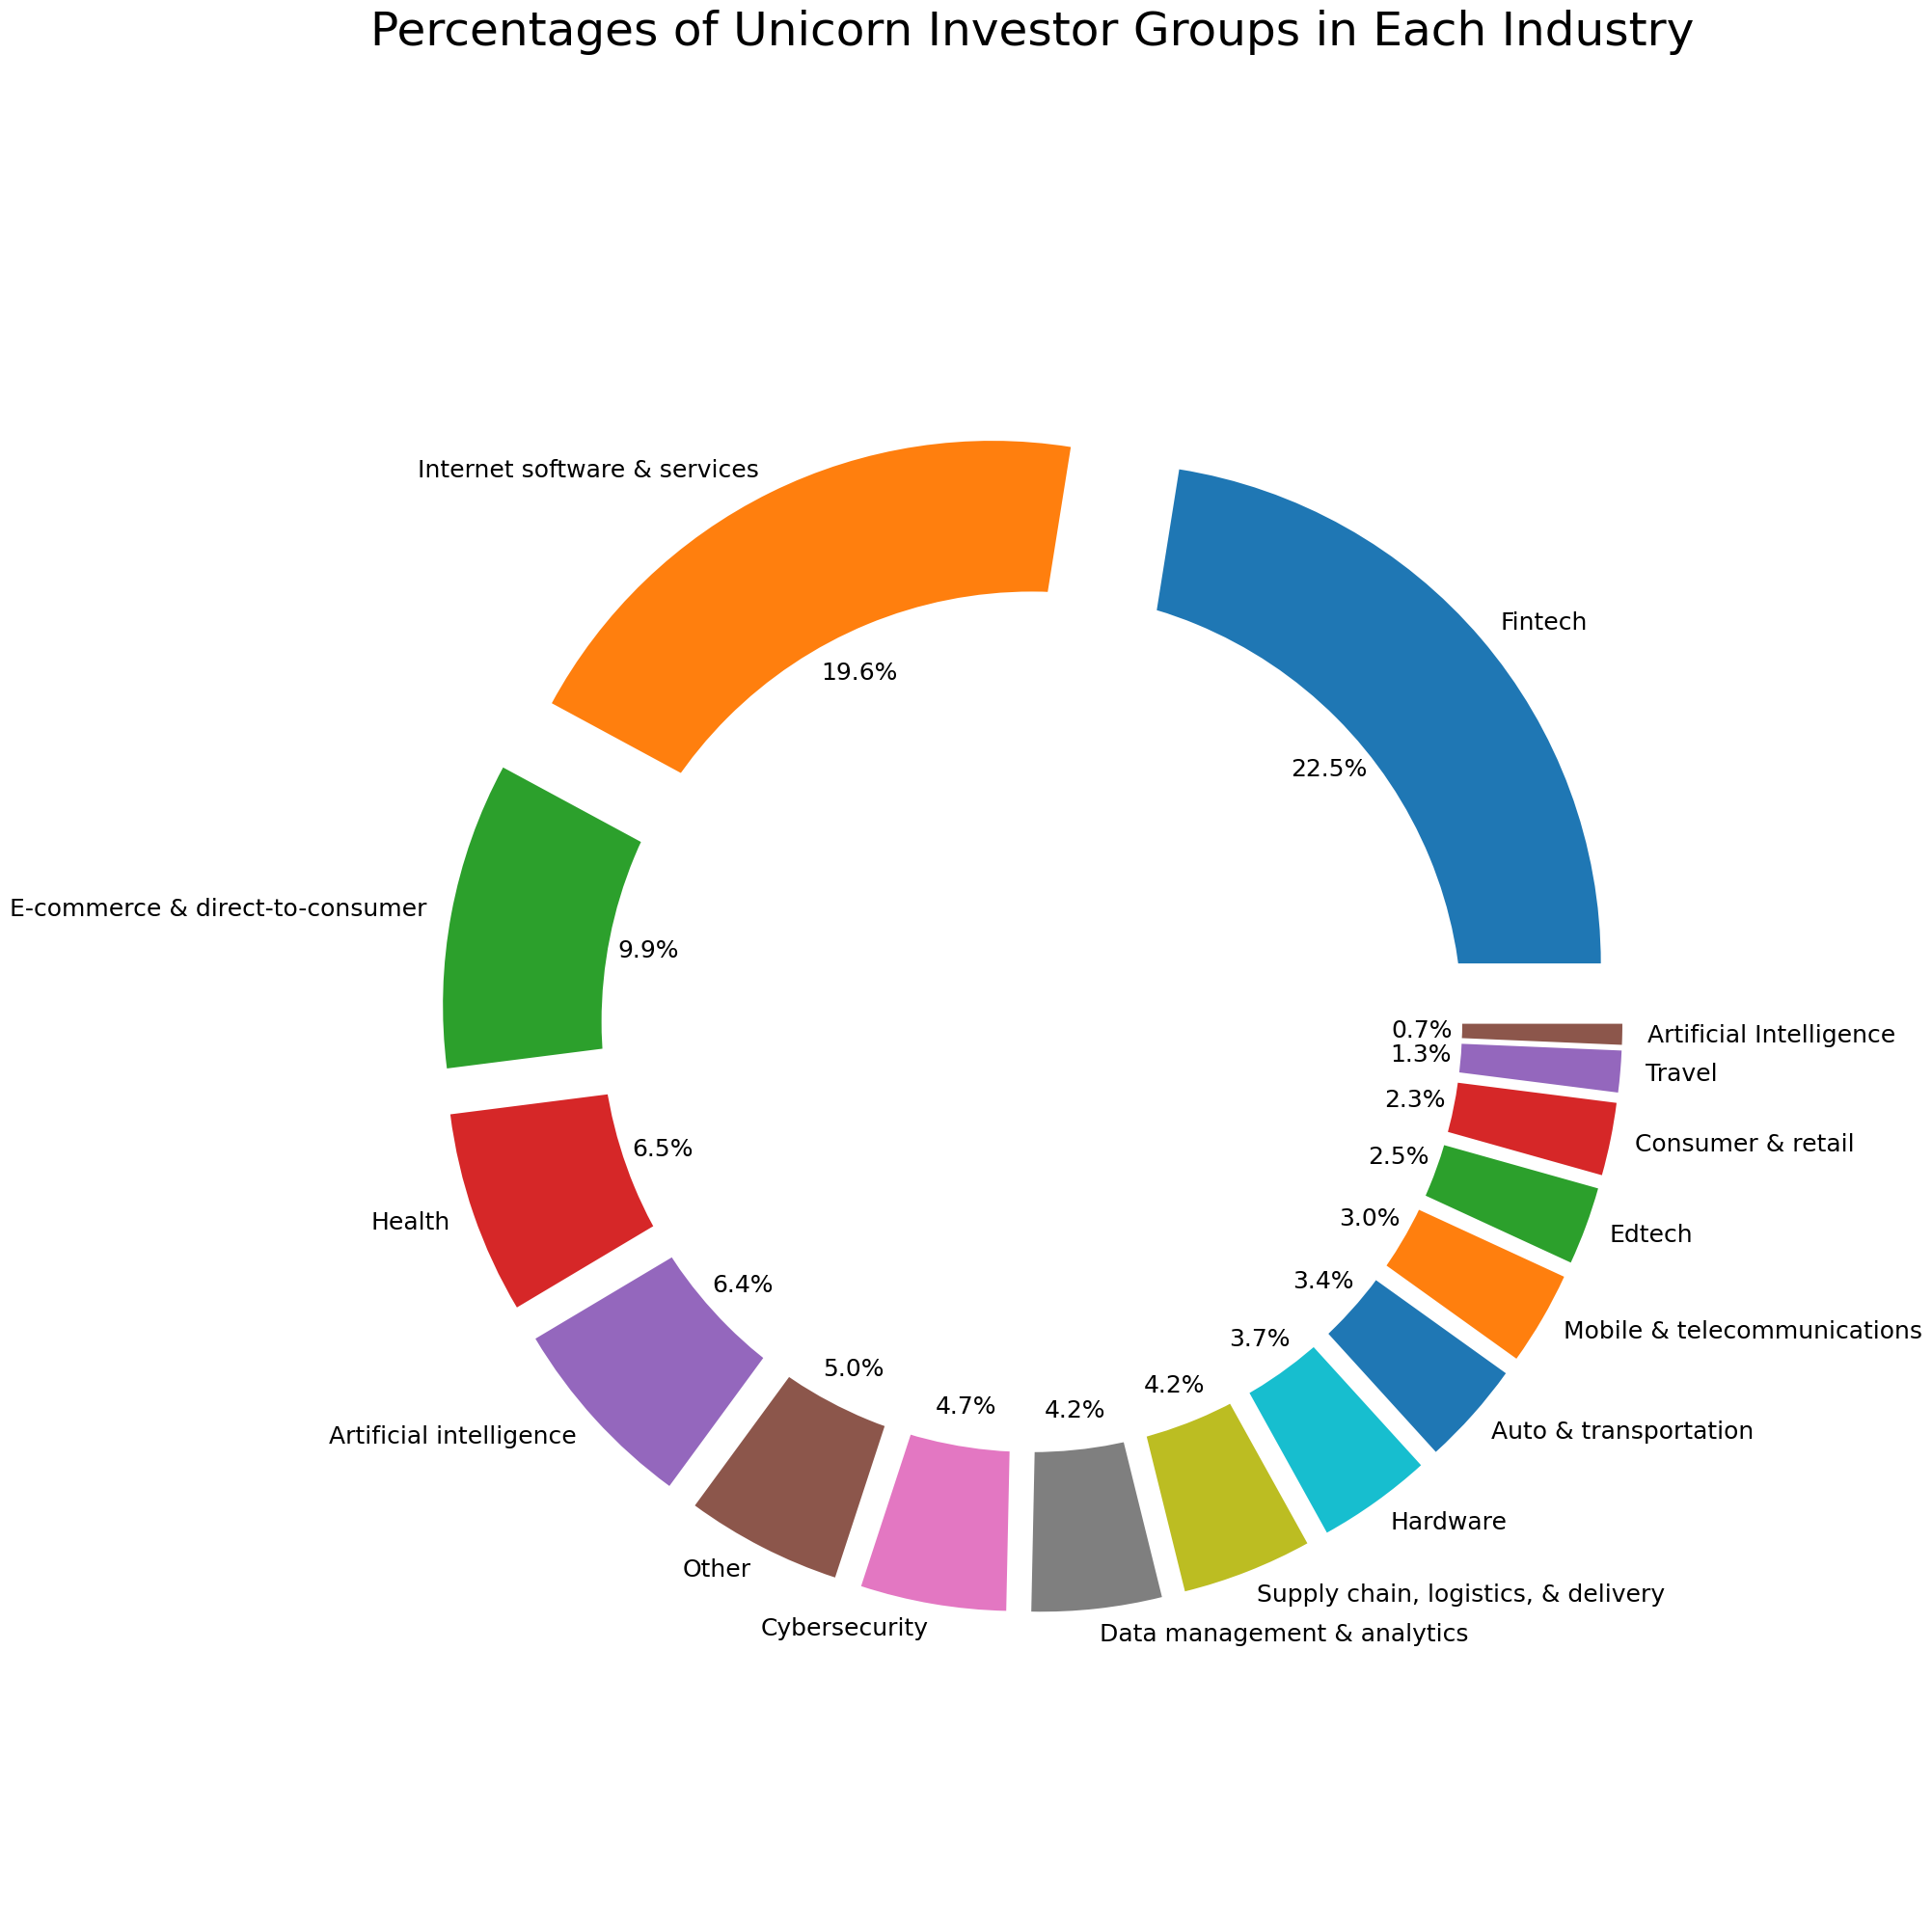

In [160]:
plt.figure(figsize=(20,20))
plt.rcParams['font.size'] = 14

myexplode = [0.18, 0.18, 0.18, 0.18, 0.18, 0.18, 0.18, 0.18, 0.18, 0.18, 0.18, 0.18, 0.18, 0.18, 0.18, 0.18]
plt.pie(industry_investors, labels = industry_investors.index, labeldistance = 1.05, autopct='%1.1f%%', explode = myexplode, textprops={'fontsize': 18})

fig = plt.gcf()
plt.pie([100], colors=['white'], radius=0.86)

plt.axis('equal')
plt.title('Percentages of Unicorn Investor Groups in Each Industry', y=1.05, fontsize=35)
plt.tight_layout()

plt.show()

### The following shows the number of Unicorn Companies based in each City

In [161]:
comp_city = df.groupby('City')['Company'].count()

print('City', '     :     ', 'Company Count')
pd.set_option('display.max_rows', None)
comp_city = comp_city.sort_values(ascending=False)
print(comp_city)

City      :      Company Count
City
San Francisco          104
New York                47
Beijing                 24
London                  20
Shanghai                19
Bengaluru               17
Boston                  16
Paris                   13
Palo Alto               11
Shenzhen                10
Mountain View           10
Berlin                  10
Tel Aviv                 7
Redwood City             7
Seoul                    7
Sao Paulo                7
Chicago                  6
Sunnyvale                6
Gurgaon                  5
Los Angeles              5
San Mateo                5
Atlanta                  5
Mumbai                   5
Santa Clara              5
Seattle                  4
Oakland                  4
Amsterdam                4
Hangzhou                 4
Miami                    4
Dallas                   3
Stockholm                3
San Jose                 3
San Diego                3
Cambridge                3
Tokyo                    3
Munich             

In [162]:
df = df.replace('Artificial intelligence', 'Artificial Intelligence')

In [163]:
df_uniInd = df['Industry'].unique()
print(df_uniInd)

['Artificial Intelligence' 'Other' 'E-commerce & direct-to-consumer'
 'Fintech' 'Internet software & services'
 'Supply chain, logistics, & delivery' 'Consumer & retail'
 'Data management & analytics' 'Edtech' 'Health' 'Hardware'
 'Auto & transportation' 'Travel' 'Cybersecurity'
 'Mobile & telecommunications']


In [164]:
dfUni = df['Investor_groups'].unique()
print(dfUni)

['Sequoia Capital China, SIG Asia Investments, Sina Weibo, Softbank Group'
 'Founders Fund, Draper Fisher Jurvetson, Rothenberg Ventures'
 'Tiger Global Management, Sequoia Capital China, Shunwei Capital Partners'
 'Khosla Ventures, LowercaseCapital, capitalG'
 'Institutional Venture Partners, Sequoia Capital, General Atlantic'
 'Sequoia Capital China, Blackbird Ventures, Matrix Partners'
 'Tiger Global Management, Insight Partners, DST Global'
 'Khosla Ventures, Kleiner Perkins Caufield & Byers, Collaborative Fund'
 'Tiger Global Management'
 'Andreessen Horowitz, New Enterprise Associates, Battery Ventures'
 'index Ventures, DST Global, Ribbit Capital'
 'Tencent Holdings, KKR, Smash Ventures'
 'SoftBank Group, Andreessen Horowitz, Temasek Holdings'
 'Forerunner Ventures, Crosslink Capital, Homebrew'
 'Tencent Holdings, Lightspeed India Partners, Sequoia Capital India'
 'Hillhouse Capital Management, Boyu Capital, Sequoia Capital China'
 'GGV Capital, ZhenFund, Tencent'
 'Accel, AltaI

### Dropped rows with unknown values for company funding or valuation
### Added a Profit column by subtracting company funding from recent company valuation

In [165]:
df = df.drop(df[df['Valuation'] == 'Unknown'].index)
df = df.drop(df[df['Funding'] == 'Unknown'].index)

In [166]:
df['Valuation'] = df['Valuation'].astype(float)
df['Funding'] = df['Funding'].astype(float)

In [167]:
df['Profit'] = df['Valuation'] - df['Funding']

### Company with the highest profit based on funding and valuation

In [168]:
maxProf = df['Profit'].max()
hiProfComp = df.loc[df['Profit'] == maxProf, 'Company'].iloc[0]
print(hiProfComp)
print(f'${maxProf:,.2f}')

Bytedance
$172,000,000,000.00


### Company with the lowest profit based on funding and valuation

In [169]:
minProf = df['Profit'].min()
lowProfComp = df.loc[df['Profit'] == minProf, 'Company'].iloc[0]
print(lowProfComp)
print(f'${minProf:,.2f}')

Magic Leap
$-1,000,000,000.00


### The 12 most profitable investor groups

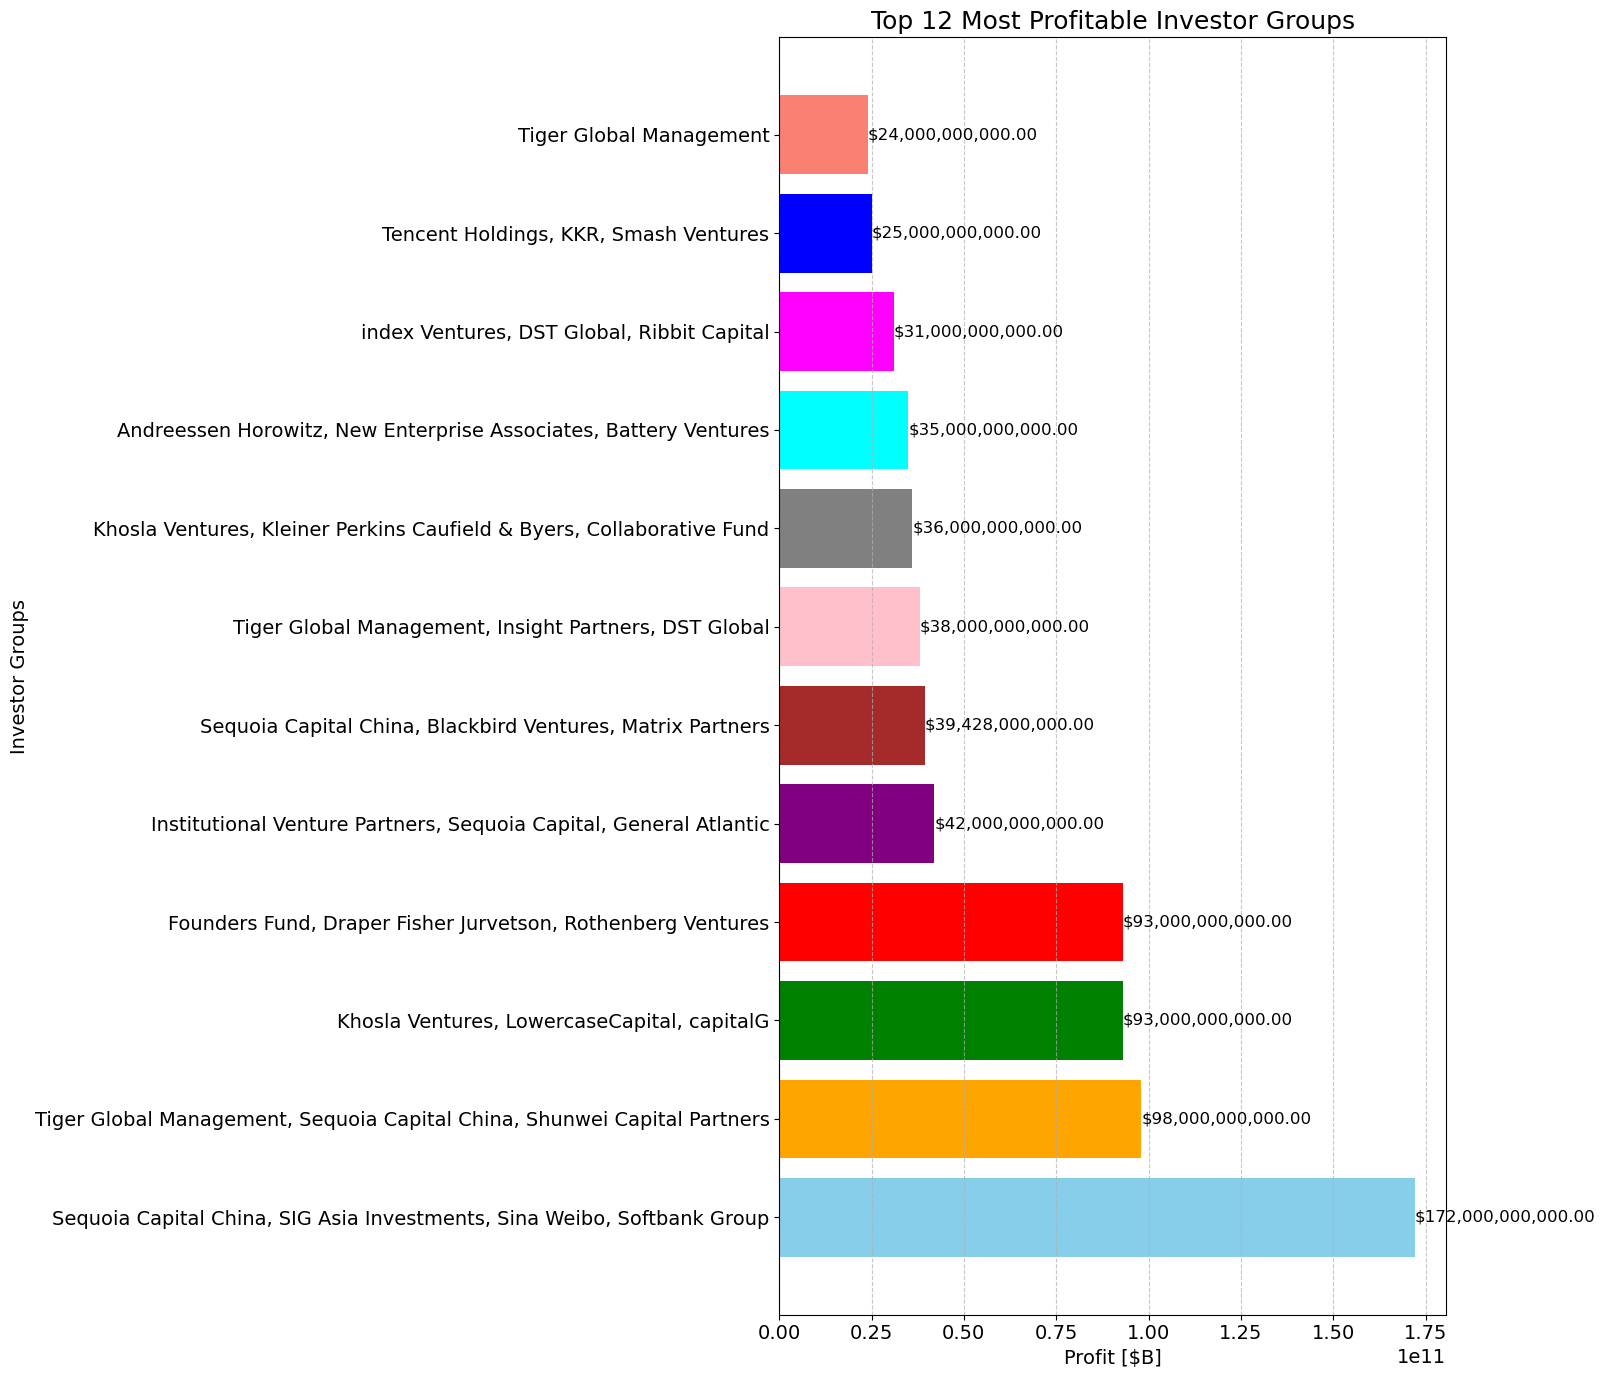

In [171]:
df_sorted_desc = df.sort_values(by='Profit', ascending=False)
top_12 = df_sorted_desc.head(12)

colors = ['skyblue', 'orange', 'green', 'red', 'purple', 'brown', 'pink', 'gray', 'cyan', 'magenta', 'blue', 'salmon']

plt.figure(figsize=(16, 14))

bars = plt.barh(top_12['Investor_groups'], top_12['Profit'], color=colors)

for bar in bars:
    xval = bar.get_width()
    plt.text(xval, bar.get_y() + bar.get_height()/2,
             '${:,.2f}'.format(xval), va='center', fontsize=12) # Add profit values to bars

plt.title('Top 12 Most Profitable Investor Groups', fontsize=18)
plt.xlabel('Profit [$B]', fontsize=14)
plt.ylabel('Investor Groups', fontsize=14)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()

plt.show()

### The 12 least profitable investor groups

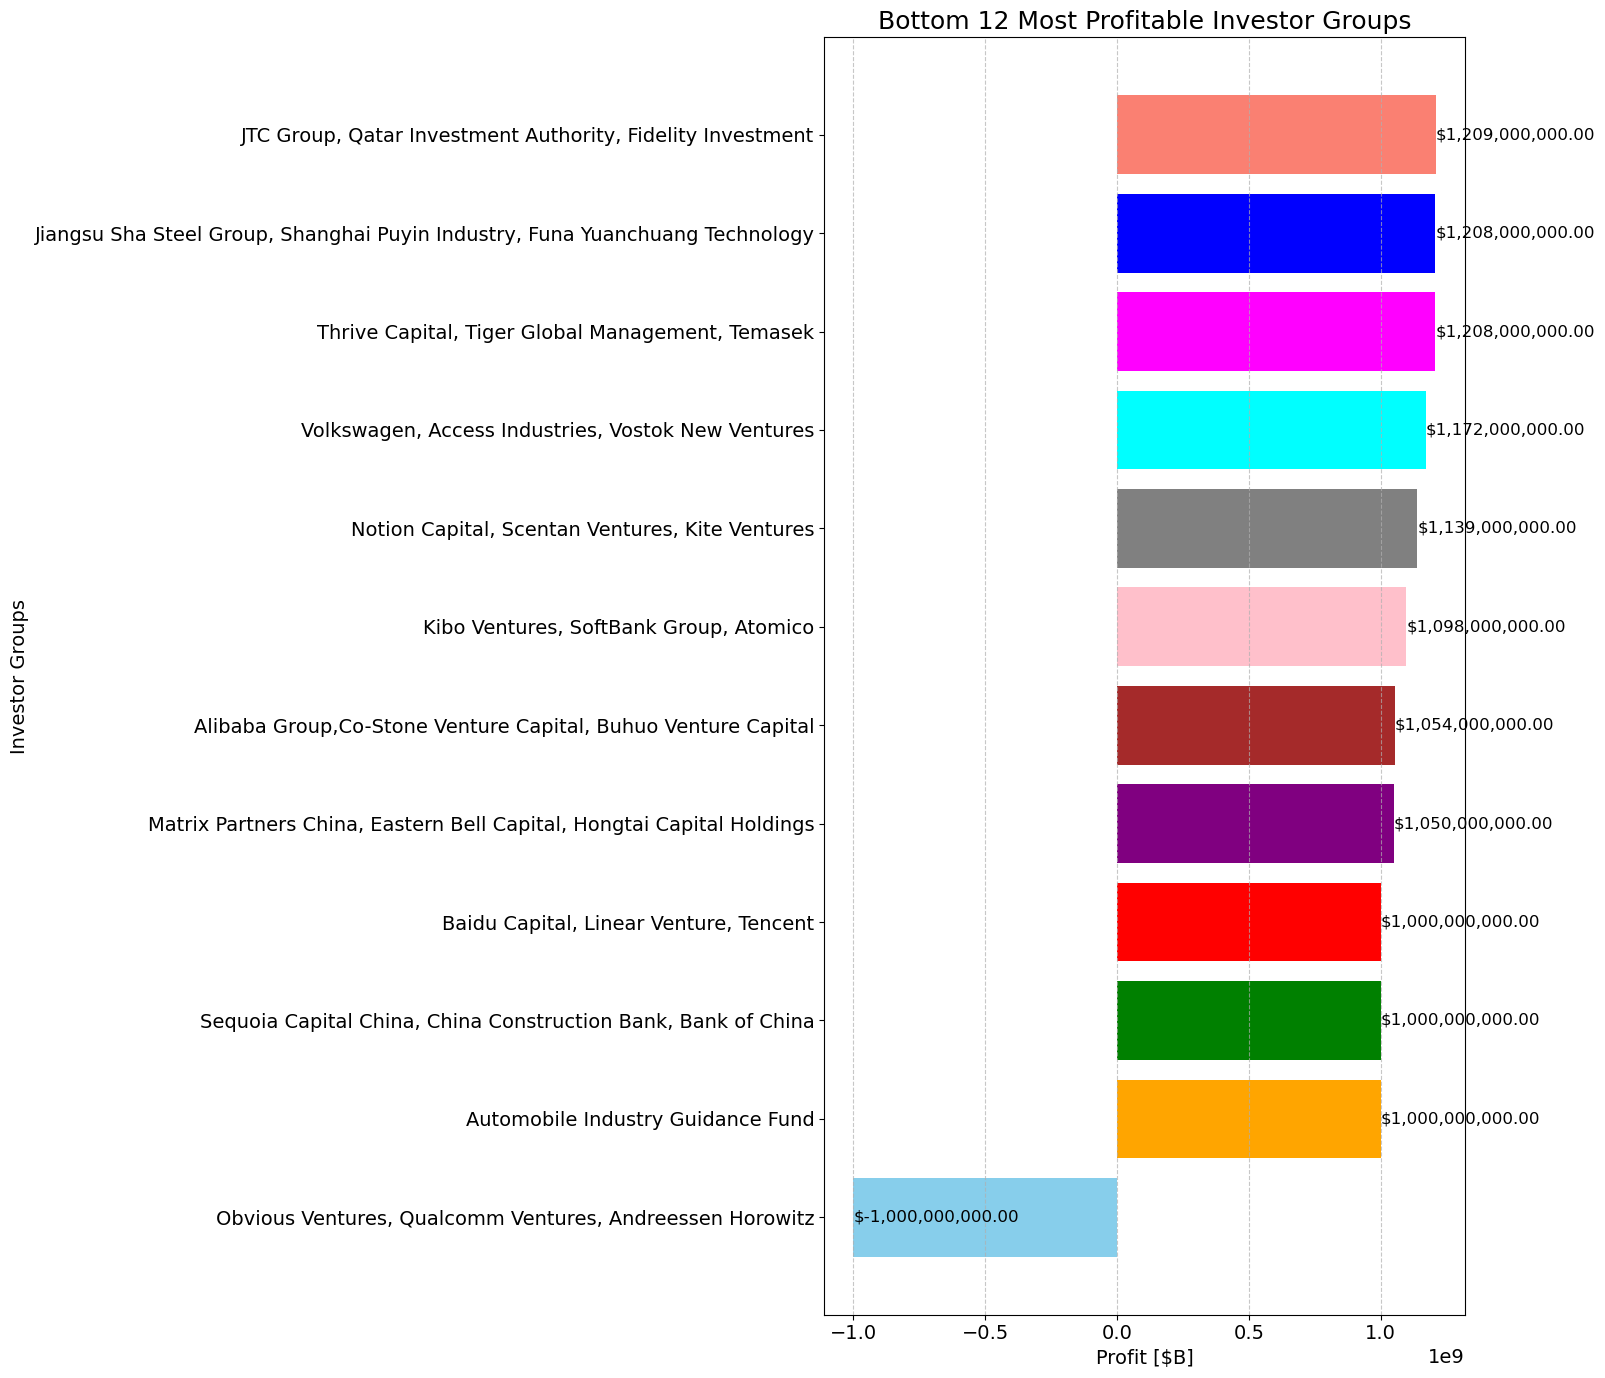

In [173]:
df_sorted_asc = df.sort_values(by='Profit', ascending=True)
bot_12 = df_sorted_asc.head(12)

colors = ['skyblue', 'orange', 'green', 'red', 'purple', 'brown', 'pink', 'gray', 'cyan', 'magenta', 'blue', 'salmon']

plt.figure(figsize=(16, 14))

bars = plt.barh(bot_12['Investor_groups'], bot_12['Profit'], color=colors)

for bar in bars:
    xval = bar.get_width()
    plt.text(xval, bar.get_y() + bar.get_height()/2,
             '${:,.2f}'.format(xval), va='center', fontsize=12) # Add profit values to bars

plt.title('Bottom 12 Most Profitable Investor Groups', fontsize=18)
plt.xlabel('Profit [$B]', fontsize=14)
plt.ylabel('Investor Groups', fontsize=14)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()

plt.show()

### Calculated the years since each company gained Unicorn status

In [174]:
df['Unicorn_status_date'] = pd.to_datetime(df['Unicorn_status_date'])
today = date.today()
print(today)

2024-05-05


In [175]:
df['Unicorn_status_date'] = pd.to_datetime(df['Unicorn_status_date'])
df['Years_since_founding'] = today.year - df['Unicorn_status_date'].dt.year

### Calculated the average yearly profit since each company reached Unicorn status
### for the companies with the best and worst ROI's

In [176]:
df['Avg_yrly_prof'] = df['Profit']/df['Years_since_founding']

In [177]:
maxGrow = df['Avg_yrly_prof'].max()
hiAvgComp = '{:,.2f}'.format(maxGrow)
print(df.loc[df['Avg_yrly_prof'] == maxGrow, 'Company'].iloc[0])
print('$', hiAvgComp)

print()

minGrow = df['Avg_yrly_prof'].min()
lowAvgComp = '{:,.2f}'.format(minGrow)
print(df.loc[df['Avg_yrly_prof'] == minGrow, 'Company'].iloc[0])
print('$', lowAvgComp)

Bytedance
$ 24,571,428,571.43

Magic Leap
$ -100,000,000.00


In [178]:
def currency_format(value):
    return '${:,.2f}'.format(value)

df['Valuation'] = df['Valuation'].map(currency_format)
df['Funding'] = df['Funding'].map(currency_format)
df['Profit'] = df['Profit'].map(currency_format)
df['Avg_yrly_prof'] = df['Avg_yrly_prof'].map(currency_format)

df

,Company,Valuation,Unicorn_status_date,Industry,City,Country,Continent,Year_founded,Funding,Investor_groups,Profit,Years_since_founding,Avg_yrly_prof
0,Bytedance,"$180,000,000,000.00",2017-04-07,Artificial Intelligence,Beijing,China,Asia,2012,"$8,000,000,000.00","Sequoia Capital China, SIG Asia Investments, Sina Weibo, Softbank Group","$172,000,000,000.00",7,"$24,571,428,571.43"
1,SpaceX,"$100,000,000,000.00",2012-12-01,Other,Hawthorne,United States,North America,2002,"$7,000,000,000.00","Founders Fund, Draper Fisher Jurvetson, Rothenberg Ventures","$93,000,000,000.00",12,"$7,750,000,000.00"
2,SHEIN,"$100,000,000,000.00",2018-07-03,E-commerce & direct-to-consumer,Shenzhen,China,Asia,2008,"$2,000,000,000.00","Tiger Global Management, Sequoia Capital China, Shunwei Capital Partners","$98,000,000,000.00",6,"$16,333,333,333.33"
3,Stripe,"$95,000,000,000.00",2014-01-23,Fintech,San Francisco,United States,North America,2010,"$2,000,000,000.00","Khosla Ventures, LowercaseCapital, capitalG","$93,000,000,000.00",10,"$9,300,000,000.00"
4,Klarna,"$46,000,000,000.00",2011-12-12,Fintech,Stockholm,Sweden,Europe,2005,"$4,000,000,000.00","Institutional Venture Partners, Sequoia Capital, General Atlantic","$42,000,000,000.00",13,"$3,230,769,230.77"
5,Canva,"$40,000,000,000.00",2018-01-08,Internet software & services,Surry Hills,Australia,Oceania,2012,"$572,000,000.00","Sequoia Capital China, Blackbird Ventures, Matrix Partners","$39,428,000,000.00",6,"$6,571,333,333.33"
6,Checkout.com,"$40,000,000,000.00",2019-05-02,Fintech,London,United Kingdom,Europe,2012,"$2,000,000,000.00","Tiger Global Management, Insight Partners, DST Global","$38,000,000,000.00",5,"$7,600,000,000.00"
7,Instacart,"$39,000,000,000.00",2014-12-30,"Supply chain, logistics, & delivery",San Francisco,United States,North America,2012,"$3,000,000,000.00","Khosla Ventures, Kleiner Perkins Caufield & Byers, Collaborative Fund","$36,000,000,000.00",10,"$3,600,000,000.00"
8,JUUL Labs,"$38,000,000,000.00",2017-12-20,Consumer & retail,San Francisco,United States,North America,2015,"$14,000,000,000.00",Tiger Global Management,"$24,000,000,000.00",7,"$3,428,571,428.57"
9,Databricks,"$38,000,000,000.00",2019-02-05,Data management & analytics,San Francisco,United States,North America,2013,"$3,000,000,000.00","Andreessen Horowitz, New Enterprise Associates, Battery Ventures","$35,000,000,000.00",5,"$7,000,000,000.00"


## Analysis Questions

### -Which industry was the most lucrative for Unicorn companies?

#### Fintech was the most profitable, having the highest number of unicorn company activity: 22.5%

### -Which city was the most popular for Unicorn company development?

#### San Francisco had the highest volume of Unicorn companies - 104 companies

### -Which companies have the best and worst Return on investment?

#### Bytedance had the best ROI of 172B
#### Magic Leap had the worst ROI of -1B

### -Which investor groups were the most and least profitable?

#### Sequoia Capital China/SIG Asia Investments/Sina Weibi/Softbank Group was the most profitable investor group
#### Obvious Ventures, Qualcomm Ventures, Andreessen Horowitz was the least profitable investor group

### -Which Unicorn companies had the best/worst average yearly growth in profit? I calculated this in case the companies differed from those with the best and worst return on investment

#### Bytedance had the best average yearly profit growth generating approximately 24.57 billion dollars per year since its founding
#### On the other hand, Magic Leap had the worst  yearly profit growth, and lost 100 million dollars on average per year since its founding